# Clustering Crypto

In [67]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [68]:
# Load the crypto_data.csv dataset.
file_path = "resources/crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
print(crypto_df.shape)
crypto_df.head(10)

(1252, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [69]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
not_traded = crypto_df[crypto_df['IsTrading']==False].index
crypto_df.drop(not_traded, inplace = True)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [70]:
# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE
algo =crypto_df['Algorithm'].unique()
print(algo)

['Scrypt' 'X11' 'SHA-256' 'X13' 'Ethash' 'CryptoNight-V7' 'Equihash'
 'SHA-512' 'Multiple' 'X15' 'NIST5' 'Quark' 'Groestl' 'PoS' 'NeoScrypt'
 'SHA3' 'HybridScryptHash256' 'Scrypt-n' 'PHI1612' 'Lyra2REv2'
 'CryptoNight' 'Shabal256' 'Counterparty' 'Blake' 'Momentum'
 'Stanford Folding' 'QuBit' 'XG Hash' 'M7 POW' 'Curve25519' 'Lyra2RE'
 'QUAIT' 'vDPOS' 'Blake2b' 'BLAKE256' '1GB AES Pattern Search' 'Dagger'
 'CryptoNight-Lite' 'X11GOST' 'SHA-256D' 'POS 3.0' 'Progressive-n' 'DPoS'
 'Lyra2Z' 'X14' 'Time Travel' 'Argon2' 'Keccak' 'Blake2S'
 'Dagger-Hashimoto' '536' 'Argon2d' 'Cloverhash' 'Skein'
 'SkunkHash v2 Raptor' 'VeChainThor Authority' 'Ouroboros' 'POS 2.0'
 'SkunkHash' 'C11' 'Proof-of-BibleHash' 'SHA-256 + Hive'
 'Proof-of-Authority' 'XEVAN' 'VBFT' 'YescryptR16' 'IMesh'
 'Green Protocol' 'Semux BFT consensus' 'X16R' 'Tribus'
 'CryptoNight Heavy' 'Jump Consistent Hash' 'HMQ1725' 'Zhash'
 'Cryptonight-GPU' 'ECC 256K1' 'CryptoNight Heavy X' 'Rainforest' 'Exosis'
 'CryptoNight-lite' 'Quark

In [71]:
# Find null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [72]:
# Not sure this is necessary as there are no null values for "Algorithm"
not_working = crypto_df[crypto_df['Algorithm'].isnull()].index
crypto_df.drop(not_working, inplace = True)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [73]:
# Remove the "IsTrading" column. 
crypto_df.drop(columns=['IsTrading'], inplace=True)
print(crypto_df.shape)
crypto_df.head()

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [74]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [75]:
# Keep the rows where coins are mined.
no_coins = crypto_df[crypto_df['TotalCoinsMined']==0].index
crypto_df.drop(no_coins, inplace = True)
print(crypto_df.shape)
crypto_df.head(10)

(533, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [76]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coin_df = pd.DataFrame(crypto_df['CoinName'])
print(coin_df.shape)
coin_df.head()

(533, 1)


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [77]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df.drop(columns=['CoinName'], inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(533, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [78]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head(10)

(533, 100)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled[0:5]

array([[-0.11674788, -0.15286468, -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.07523548, -0.0433555 , -0.06137164, -0.06137164,
        -0.0433555 , -0.0433555 , -0.19226279, -0.06137164, -0.09731237,
        -0.0433555 , -0.11536024, -0.07523548, -0.0433555 , -0.0433555 ,
        -0.15176505, -0.0433555 , -0.13105561, -0.0433555 , -0.0433555 ,
        -0.08695652, -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.0433555 , -0.08695652, -0.08695652, -0.08695652,
        -0.0433555 , -0.13105561, -0.13827675, -0.13827675, -0.0433555 ,
        -0.06137164, -0.0433555 , -0.07523548, -0.1815096 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.07523548, -0.15811388, -0.3145935 ,
        -0.0433555 , -0.08695652, -0.07523548, -0.06137164, -0.0433555 ,
         1.38873015, -0.0433555 , -0.0433555 , -0.06137164, -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.39836623, -0.0

### Deliverable 2: Reducing Data Dimensions Using PCA

In [80]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
pcs = pca.fit_transform(crypto_scaled)

In [81]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(data=pcs, columns=["PC 1", "PC 2", "PC 3"], index=crypto_df.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.336733,1.067701,-0.552265
404,-0.320002,1.067743,-0.552610
1337,2.313877,1.582083,-0.724442
BTC,-0.146391,-1.336804,0.203588
ETH,-0.146055,-2.058982,0.350578
LTC,-0.166024,-1.087709,-0.012020
DASH,-0.380359,1.235368,-0.493468
XMR,-0.150268,-2.292600,0.341838
ETC,-0.144489,-2.059088,0.350553
ZEC,-0.181092,-2.288589,0.380642


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\chris\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


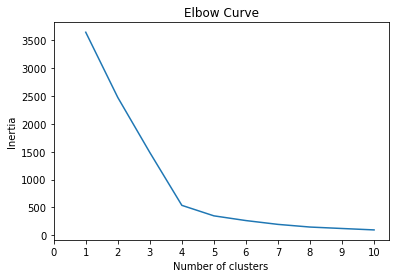

In [82]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

In [83]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

In [85]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = coin_df["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(533, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.336733,1.067701,-0.552265,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320002,1.067743,-0.552610,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.313877,1.582083,-0.724442,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.146391,-1.336804,0.203588,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.146055,-2.058982,0.350578,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.166024,-1.087709,-0.012020,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.380359,1.235368,-0.493468,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.150268,-2.292600,0.341838,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.144489,-2.059088,0.350553,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.181092,-2.288589,0.380642,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [ ]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE


In [ ]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

In [ ]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
